# Solutions 1


## FX Time Option   

An FX time option is a forward contract to exchange a pre-determined
amount of a currency at a pre-determined strike $K$ within a future
time period $[T_1,T_2]$. 

It is called a time option because of the American-style exercise feature. 
The holder can choose in this period to exercise parts of the total amount, 
but the total amount and no more must be exercised before or at time $T_2$.

We take the EUR/USD as the target exchange rate. A long position in a EUR
time option receives EUR at the exercise dates and pays USD. 

A short position will be paying EUR and receiving USD.

Assume a trader that is trying to maximise his payoff from this option. 

### FX Time Option vs Forward

Assume the trader is offered instead a plain-vanilla European forward, 
where he is required to exchange the full amount for the strike price at
a fixed future date. 

The payoff of the time option dominates that of a forward with expiry $T_1$ as 
the holder is free to exercise the time option at $T_1$ or wait if the 
continuation value is higher so he does at least better with the time option.

The payoff the time option also dominates that of a forward with expiry $T_2$, 
since the holder is free to wait to $T_2$ to exercise, but has the additional 
optionality of exercising earlier.


### FX Time Option vs American Forward

Assume the trader is offered instead a “straight" American forward,
where he can choose the exercise time during the exercise period 
$[T_1,T_2]$ but has to exercise the full amount in a unique exercise. 

He is indifferent between the time option and the American forward, 
since if it is optimal to exercise the time option because the exercise
value is larger than the continuation value, then it would be optimal 
to exercise fully and so there is no additional value from the freedom
to exercise in parts.

### FX Time Option vs Long American call and Short European Put

Assume the trader is offered instead a portfolio consisting of:

- a long American call option with exercise period $[T_1,T_2]$,
- a short Europen put option with expiry $T_2$.
  
It is not possible to exactly replicate the time option with this portfolio.
The replication fails when it is optimal to exercise early but the put expires 
in the money as he cannot cancel the put position.

### FX Time Option fair strike vs Forward fair strike

For a Long position (EUR buyer), consider the fair strike of the time option
compared to the plain-vanilla forwards with the following strikes:

- with expiry $T_1$,
- with expiry $T_2$,
- with the maximum forward price $F_M$ for all expiries falling in the period $[T_1,T_2]$, i.e. 
$$F_M = \max_{T \in [T_1,T_2]} F(T)$$
where $F(T)$ denotes the forward price for expiry $T$.

The fair strike of the time option is higher than any of these strikes, because by exercising 
optimally the trader has the option to do better than all forwards.

## No-arbitrage bounds for a digital option

In [Merton (1973)](../readings/r1_merton1973.html), we saw in :eqref:`callbounds` 
there were bounds on the price of a call option. 

We can prove similar bounds for any option with a single payoff time using a portfolio of
the underlying and a risk-free bond. The main idea consists in creating a portfolio
that dominates the payoff. We look for the cheapest portfolio of stocks and bonds
which dominates the option payoff at expiry, and for the most expensive 
portfolio dominated by it at expiry.

The payoff of a portfolio of stocks and zero-coupond bonds is a linear function, and hence
what we are in effect doing is looking for a closest straight lines above and below the payoff.

In this problem, you are asked to use the same approach to find the bounds on a digital call 
option with strike $K$ and expiry $T$ on a non-dividend paying stock. 

The digital call pays $1$ at expiry if the stock is higher than the strike and zero otherwise.

### Digital call option payoff

A digital call option pays $1$ if the underlying is above the strike at expiry and zero otherwise, 
hence the payoff function is:
$$H(S_T,K)=\mathbf{1}_{\{S_T \geq K\}}$$
  
By arbitrage-free pricing the value of the option is 
$$e^{-r T} \mathbf{E}^{\mathbf{Q}}\left[ H(S_T,K) \right] = 
e^{-r T} \mathbf{E}^{\mathbf{Q}}\left[ \mathbf{1}_{\{S_T \geq K\}} \right]$$

By definition of the term $\mathbf{E}^{\mathbf{Q}}\left[ \mathbf{1}_{\{S_T \geq K\}} \right]$ is the
probability that the underlying is above the strike at expiry under the risk-neutral measure.

In the Black-Scholes model that probability is given by the term
$$N(d_2)$$
where $d_2= \frac{\log(S/K)+(r-\frac{\sigma^2}{2})T}{\sigma \sqrt{T}}$, and $N(x)$ the standard
normal cumulative distribution function.

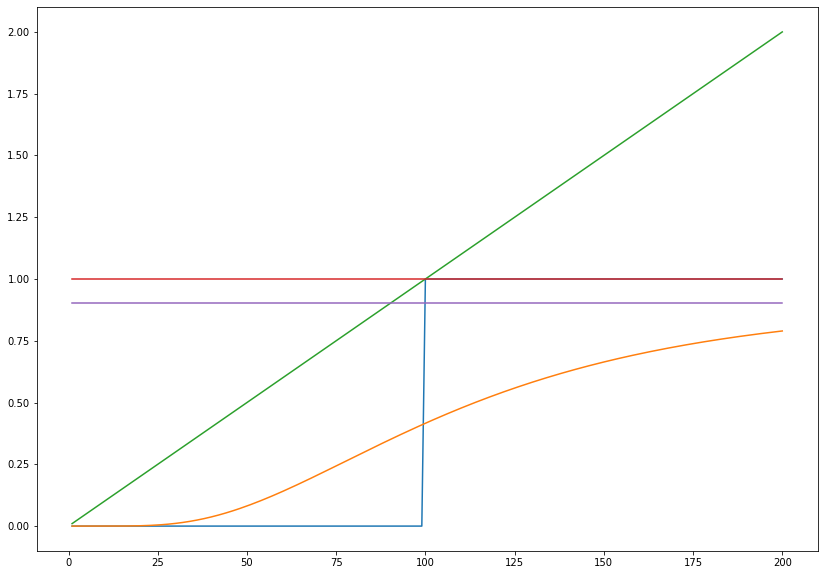

In [1]:
%matplotlib inline
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import stats
plt.rcParams['figure.figsize'] = (14,10)

K = 100
T = 5
r = 0.02
vol = 0.25

def bs_digital_call_value(S, K, T, r, vol):
    '''Computes BSM digital call option value'''
    d2 = (np.log(S/K) + (r - (vol**2)/2) * T) / (vol*np.sqrt(T))    
    val = np.exp(-r * T) * stats.norm.cdf(d2)

    return val

S = np.linspace(1, 200, 200)

digital_call_payoffs = np.where(S>= K, 1., 0.)
digital_call_values = bs_digital_call_value(S, K, T, r, vol)
linear_dominating_nobond = 1/K * S
linear_dominating_nostock = np.full_like(S, 1)
upper_bound_price = np.full_like(S, np.exp(-r *T))

plt.figure()
plt.plot(S, digital_call_payoffs)
plt.plot(S, digital_call_values)
plt.plot(S, linear_dominating_nobond)
plt.plot(S, linear_dominating_nostock)
plt.plot(S, upper_bound_price)
plt.show()

### Digital call dominating portfolios

We are looking for portfolios that dominate the digital call payoff, 
with investment in $\alpha$ stocks and $\beta$ zero-coupon bonds. 

We denote by $S_t$ the value of the stock at time $t$ and $B_t^T$ the value
at time $t$ of the zero-coupon bond for expiry $T$.

At expiry, the stock is worth $S_T$ and a zero-coupon pays $1$, hence  
the payoff of the portfolio is given by
$$\alpha S_T + \beta$$

The current value of the stock is $S_0$ and that of the zero-coupon bond is
$e^{-r T}$, hence the portfolio value is
$$\alpha S_0 + \beta e^{-r T}$$

#### Dominating portfolio with no bonds

- At expiry, when the stock is worth zero, the portfolio's payoff is $\beta$ while
the digital call payoff is $0$. Hence, for the portfolio's payoff to match the 
digital's when the stock is zero, it is required to set $\beta=0$.

- At expiry, when the stock is equalt to $K$, the digital's payoff is $1$ 
and the portfolio's payoff is $\alpha K$. Hence, for the portfolio's payoff to match the 
digital's when the stock is $K$, it is required to set $\alpha=\frac{1}{K}$. 

Thus, we have a dominating portfolio with $\alpha=\frac{1}{K}$ stocks and no investment
in the zero-coupon bonds. It has a payoff of
$$\frac{1}{K}S_T$$

#### Dominating portfolio with no stocks

A different dominating portfolio with no stock investment is also possible. Without investment
in stocks the payoff is $\beta$. For that payoff to dominate the digital's, given that the digital 
payoff is less or equal to $1$, then it is enough to set $\beta=1$.


#### Digital call price upper bound.

The digital payoff is dominated by both portfolios we have seen so far:

- an investment of $\frac{1}{K}$ in the stock with payoff $\frac{1}{K}S_T$, and
- an investment in a single zero-coupon bond with payoff $1$

The values of these portfolios are given by

- $\frac{1}{K}S_0$, and
- $e^{-r * T}$

Thus the digital is dominated by the minimum of the two, and hence it is worth less than
$$\min\left(e^{-r * T},\frac{S_0}{K}\right)$$

In the case where the option is at the money, $S_0=K$, and the positive interest rates $r \geq 0$,
this simplifies to $e^{-r * T}$.

### The optimal lower bound for the digital call is zero

Since the payoff is always zero or more, we know that zero is a lower bound. 
In fact $0$ is the optimal lower bound, i.e. there is no higher lower bound.

To prove that, note that the lower bound must be below zero at infinity,
and so must have zero or negative slope $\alpha$. At zero, the value of the digital
is zero and so the number of zero-coupon bonds $\beta$ must also be non-positive. 
Given that both
$$\alpha \leq 0$$
$$\beta \leq 0$$
then the most valuable lower bound occurs when both are zero.


## Static replication

### Collar strategy

A collar is an option portfolio strategy made with the following positions:

- long stock
- long put with strike $L$ with expiry $T$
- short call with strike $U$ with expiry $T$

where $L < S < U$.

#### Collar payoff

Complete the code below to plot the collar payoff and value functions.

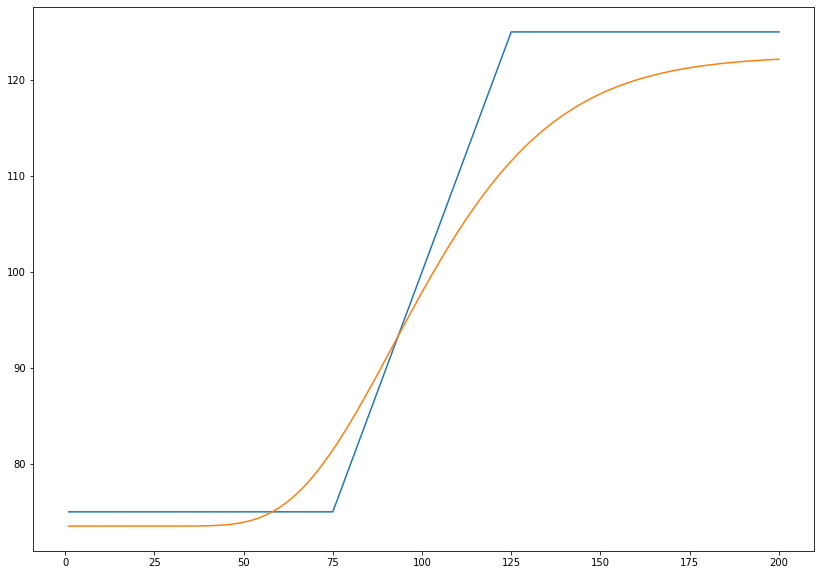

In [2]:
%matplotlib inline
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import stats
plt.rcParams['figure.figsize'] = (14,10)


L = 75
S_0 = 100
U = 125
T = 1
r = 0.02
vol = 0.25

def bs_call_value(S, K, T, r, vol):
    '''Computes BSM call option value'''
    
    d1 = (np.log(S/K) + (r + (vol**2)/2) * T) / (vol*np.sqrt(T))
    d2 = d1 - vol*np.sqrt(T)
    call = S * stats.norm.cdf(d1) - K * np.exp(-r*T) * stats.norm.cdf(d2)
    
    return call

def bs_put_value(S, K, T, r, vol):
    '''Computes BSM put option value'''
    
    d1 = (np.log(S/K) + (r + (vol**2)/2) * T) / (vol*np.sqrt(T))
    d2 = d1 - vol*np.sqrt(T)
    put = K * np.exp(-r * T) * stats.norm.cdf(-d2) - S * stats.norm.cdf(-d1)
    
    return put

S = np.linspace(1, 200, 200)

collar_payoffs = S + np.maximum(L-S,0) - np.maximum(S-U,0)
collar_values = S + bs_put_value(S, L, T, r, vol) - bs_call_value(S, U, T, r, vol)

plt.figure()
plt.plot(S, collar_payoffs)
plt.plot(S, collar_values)
plt.show()

#### Other collar decomposition

Using put-call parity
$$C(K,T) - P(K,T) = S - K e^{-r T},$$
we have
$$C(K,T) = P(K,T) + S - K e^{-r T}$$
and
$$P(K,T) = C(K,T) - S + K e^{-r T}$$
Thus, we can easily find two different portfolios with the same payoff as the collar strategy by replacing one
of the options with its equivalent portfolio from the put-call parity relations.

Replacing the put with strike $L$ by $C(L,T) - S + L e^{-r T}$, we have a replicating portfolio with:

- long zero-coupon bond with notional $L$
- long call with strike $L$
- short call with strike $U$

Replacing instead the short call with strike $U$ by $-P(U,T) - S + U e^{-r T}$, we have another replicating portfolio with:

- long zero-coupon bond with notional $U$
- long put with strike $L$
- short put with strike $U$

## Log Contract, Variance Swap and Stochastic Volatility

For simplicity assume zero interest rates and dividends 
and stock price follows the process:
$$dS_t = σ_t S_t dW_t,$$
with stochastic volatility $σ_t$.

The variance swap payoff is
$$ \frac{1}{N} \sum_{i=0}^{N-1} \left( \frac{S_{t_{i+1}}-S_{t_i}}{S_{t_i}} \right)^2 - K$$

Assume we have a derivative with log payoff:
$$\log{\frac{S_T}{S_0}}$$

### The variance swap payoff can be replicated with the log contract and stocks

A portfolio of $\frac{2}{N}\frac{1}{S_i}$ stocks, shorting $\frac{2}{N}$ contracts
on $\log{\frac{S_N}{S_0}}$, and shorting $\frac{2}{N}$ bonds across step $i$ will be
worth at time $i+1$: 
$$\frac{2}{N}\left(\frac{S_{i+1}-S_i}{S_i} - \log\left(1+\frac{S_{i+1}-S_i}{S_i}\right) \right)$$
Using quadratic expansion on $\log(1+x)$ and summing over each day we approximately replicate the 
variance swap

### Statically replicating the log contract with calls and puts

Using the result
$$\mathbf{E}_t^{\mathbf{Q}} [g(S_T)] = g(F) + \left[ \int_0^F g''(K)P_t(K,T) dK + \int_F^{\infty} g''(K) C_t(K,T) dK \right]$$
For the log contract, 
$$g''(K)=-\frac{1}{K^2}$$
and thus
$$\mathbf{E}_t^{\mathbf{Q}} \left[\log{\frac{S_T}{S_0}}\right] = - \left[ \int_0^{S_0} \frac{P(K)}{K^2} dK - \int_{S_0}^{\infty} \frac{C(K)}{K^2} dK \right]$$

### The price of the log contract

We show that the price $L(t,T)$ at time $t$ of the log contract satisfies:
 $$L(t,T) = \mathbf{E^Q}_t\left[-\frac{1}{2}\int_t^T \sigma_u^2 du \right]$$

Since $\log{\frac{S_T}{S_0}} = \int_0^T \sigma_u dW_u - \frac{1}{2} \int_0^T \sigma_u^2 du$, thus
$$\mathbf{E}_t^{\mathbf{Q}} \left[\log{\frac{S_T}{S_0}}\right] = \mathbf{E}_t^{\mathbf{Q}} \left[- \frac{1}{2} \int_0^T \sigma_u^2 du\right] $$

### Drift and volatility of the log contract

From the martingale property, we can deduce that the drift is zero as the log contract is replicable.

Denote by $\Gamma(t,T)$ the volatility of $L(t,T)$. At expiry, the contract is determined and hence
$$\Gamma(T,T) = 0$$

### Forward variance dynamics

Let $\nu_t(T)$ denote the forward variance:
  $$\nu_t(T)=\mathbf{E^Q}_t\left[\sigma_T^2\right]$$

We show that:
$$d\nu_t(T)=-2\frac{\partial\Gamma(t,T)}{\partial T}dW_t$$

Starting from the observation that $\nu_t(T)=-2 \partial_T L(t,T)$ is a martingale since
$$\mathbf{E}_s[\nu_t(T)] = \mathbf{E}_s\left[ \mathbf{E}_t[\sigma_T^2] \right] = \mathbf{E}_s[\sigma_T^2] = \nu_s(T)$$
Hence we can write
$$\nu_t(T)= \nu_0(T) + \int_0^t \beta_s(T) dW_s$$
Integrating,
$$\int_0^T \nu_t(u) du - \int_0^T \nu_0(u) du = \int_0^T \int_0^t \beta_s(T) dW_s du$$

By definition $\int_0^T \nu_t(u) du - \int_0^T \nu_0(u) du = -2 L(t,T)$ and inverting the integration order in the right
hand side:
$$-2 L(t,T) = \int_0^t \int_0^T \beta_s(u)du dW_s$$
Hence $\int_0^T \beta_s(u)du = \Gamma(t,T)$ and we can deduce the result.

### Stochastic integral of the integrated variance

We deduce the stochastic integral for $\int_0^T \sigma_t^2 dt$.

We have that $\sigma_t^2 = \mathbf{E}_t[\sigma_t^2]=\nu_t(t)$ and thus
$$\sigma_t^2 = \nu_0(t) - 2 \int_0^t \partial_t \Gamma(s,t)dW_s$$

Thus $\int_0^T \sigma_t^2 dt = \int_0^T \nu_0(t) dt - 2 \int_0^T \int_0^t  \partial_t \Gamma(s,t)dW_s dt$.
We can reverse the order of integration: $\int_0^T \int_0^t \partial_t \Gamma(s,t)dW_s dt = \int_0^T \int_s^T \partial_t \Gamma(s,t) dt dW_s = \int_0^T \Gamma(s,T)dW_s$ to conclude:
$$\int_0^T \sigma_t^2 dt = \int_0^T \nu_0(t) dt - 2 \int_0^T \Gamma(t,T)dW_t$$